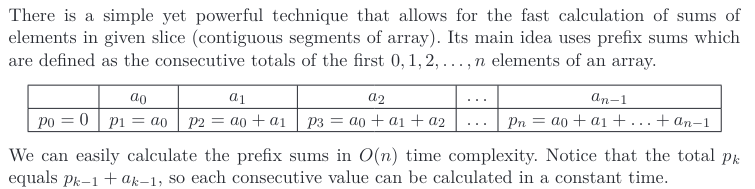

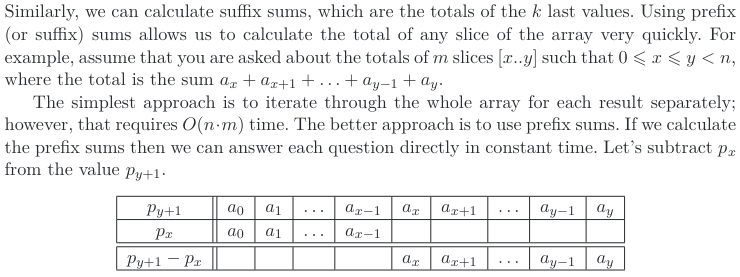
(대충 누적합으로 준비해둘 수 있다는 뜻)

예제) Mushroom Picker

mushroom 배열 A가 주어지고, k위치에서 m만큼 움직여 mushroom을 수집하는 문제.  
한 방향으로만 움직이면 반대 방향에 있는 수를 놓칠 수 있다.  
그렇다고 여러번 방향을 바꿀 필요는 없다.  

- 한 방향으로 $p$만큼 움직인다면, 반대방향으로 $m-2p$만큼 넘어갈 수 있다.
- 누적합 $C$를 계산해두고, $C[right\_position]-C[left\_position]$ 으로 result를 갱신해나가면 된다.

```python
def prefix_sum(A):
    result = [0 for _ in range(len(A))]
    for idx, val in enumerate(A):
        result[idx] = result[idx-1]+val
    return result
    
def mushroom(A, k, m):
    len_A = len(A)
    result = 0
    pref = prefix_sum(A)

    for p in range(min(m+1, k+1)): ## 움직일 수 있는 거리가 원래 포지션보다 커도 음수로 넘어가지 못하게 제한한다.
        left_position = k-p
        right_position = max(k, k+(m-2*p)) ## right position은 k로부터 m-2p만큼 더 간 값인데,  m-2p가 음수더라도 k위치에서 왼쪽으로 간거니 k가 포함되도록 정정해야한다.
        right_position = min(len_A-1, right_position) ## array 범위 넘어가지 않도록 제한.
        result = max(result, pref[right_position]-pref[left_position-1])
    for p in range(min(m+1, len_A-k)): ## 역시, array 범위 넘어가지 않도록 제한.
        right_position = k+p
        left_position = min(k, k-(m-2*p)) ## left position도 위와 같은 로직이다.
        left_position = max(0, left_position)
        result = max(result, pref[right_position]-pref[left_position-1])
    return result
```

# <span style="color:Salmon">PassingCars</span>

<div class="brinza-task-description">
<p>A non-empty array A consisting of N integers is given. The consecutive elements of array A represent consecutive cars on a road.</p>
<p>Array A contains only 0s and/or 1s:</p>
<blockquote><ul style="margin: 10px;padding: 0px;color:MediumAquamarine"><li>0 represents a car traveling east,</li>
<li>1 represents a car traveling west.</li>
</ul>
</blockquote><p>The goal is to count passing cars. We say that a pair of cars (P, Q), where 0 ≤ P &lt; Q &lt; N, is passing when P is traveling to the east and Q is traveling to the west.</p>
<p>For example, consider array A such that:</p>
<tt style="white-space:pre-wrap;color:orange">  A[0] = 0
  A[1] = 1
  A[2] = 0
  A[3] = 1
  A[4] = 1</tt>
<p>We have five pairs of passing cars: (0, 1), (0, 3), (0, 4), (2, 3), (2, 4).</p>
<p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap;color:orange"><tt>def solution(A)</tt></p></blockquote>
<p>that, given a non-empty array A of N integers, returns the number of pairs of passing cars.</p>
<p>The function should return −1 if the number of pairs of passing cars exceeds 1,000,000,000.</p>
<p>For example, given:</p>
<tt style="white-space:pre-wrap;color:orange">  A[0] = 0
  A[1] = 1
  A[2] = 0
  A[3] = 1
  A[4] = 1</tt>
<p>the function should return 5, as explained above.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px;padding: 0px;color:MediumAquamarine"><li>N is an integer within the range [<span class="number">1</span>..<span class="number">100,000</span>];</li>
<li>each element of array A is an integer that can have one of the following values: 0, 1.</li>
</ul>
</blockquote></div>

In [1]:
## O(N^2) 는 timeout 날 것이니, 진짜 매번 카운트하는 것은 불가능하다.
## 그럼 모아서 한번에 카운트하도록 해야하는데, (0, 1), (0, 3), (0, 4), (2, 3), (2, 4) 순으로 세는 것이 아니라,
## (0, 1), ([0,2], 3), ([0,2], 4), .. 와 같이 0이 등장할때마다 모아서 한번에 카운트하면 될 것 같다.

def solution(A):
    zeros = 0
    answer = 0
    for a in A:
        if a==0:
            zeros += 1
        else:
            answer += zeros
        if answer>1e+9:
            return -1
    return answer

# <span style="color:Salmon">CountDiv</span>

<div class="brinza-task-description">
<p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap;color:orange"><tt>def solution(A, B, K)</tt></p></blockquote>
<p>that, given three integers A, B and K, returns the number of integers within the range [A..B] that are divisible by K, i.e.:</p>
<blockquote><p style="color:orange">{ i : A ≤ i ≤ B, i&nbsp;<b>mod</b>&nbsp;K = 0 }</p></blockquote>
<p>For example, for A = 6, B = 11 and K = 2, your function should return 3, because there are three numbers divisible by 2 within the range [6..11], namely 6, 8 and 10.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px;padding: 0px;color:MediumAquamarine"><li>A and B are integers within the range [<span class="number">0</span>..<span class="number">2,000,000,000</span>];</li>
<li>K is an integer within the range [<span class="number">1</span>..<span class="number">2,000,000,000</span>];</li>
<li>A ≤ B.</li>
</ul>
</blockquote></div>

In [2]:
## 아니 너무 쉽다
## A, B의 범위를 보아하니 O(N)도 터지니까, O(1) 짜리로 그냥 수학연산 때려야 할 듯 싶다.

def solution(A, B, K):
    QA = (A-1)//K ## A 직전까지 들어있는 K의 배수
    QB = B//K ## B까지 들어있는 K의 배수
    return QB-QA ## 그 사이에 들어있는 K의 배수

# <span style="color:Salmon">GenomicRangeQuery</span>

<div class="brinza-task-description">
<p>A DNA sequence can be represented as a string consisting of the letters <tt style="white-space:pre-wrap">A</tt>, <tt style="white-space:pre-wrap">C</tt>, <tt style="white-space:pre-wrap">G</tt> and <tt style="white-space:pre-wrap">T</tt>, which correspond to the types of successive nucleotides in the sequence. Each nucleotide has an <i>impact factor</i>, which is an integer. Nucleotides of types <tt style="white-space:pre-wrap">A</tt>, <tt style="white-space:pre-wrap">C</tt>, <tt style="white-space:pre-wrap">G</tt> and <tt style="white-space:pre-wrap">T</tt> have impact factors of 1, 2, 3 and 4, respectively. You are going to answer several queries of the form: What is the minimal impact factor of nucleotides contained in a particular part of the given DNA sequence?</p>
<p>The DNA sequence is given as a non-empty string S = <tt style="white-space:pre-wrap">S[0]S[1]...S[N-1]</tt> consisting of N characters. There are M queries, which are given in non-empty arrays P and Q, each consisting of M integers. The K-th query (0 ≤ K &lt; M) requires you to find the minimal impact factor of nucleotides contained in the DNA sequence between positions P[K] and Q[K] (inclusive).</p>
<p>For example, consider string S = <tt style="white-space:pre-wrap">CAGCCTA</tt> and arrays P, Q such that:</p>
<tt style="white-space:pre-wrap;color:orange">    P[0] = 2    Q[0] = 4
    P[1] = 5    Q[1] = 5
    P[2] = 0    Q[2] = 6</tt>
<p>The answers to these M = 3 queries are as follows:</p>
<blockquote><ul style="margin: 10px;padding: 0px;color:MediumAquamarine"><li>The part of the DNA between positions 2 and 4 contains nucleotides <tt style="white-space:pre-wrap">G</tt> and <tt style="white-space:pre-wrap">C</tt> (twice), whose impact factors are 3 and 2 respectively, so the answer is 2.</li>
<li>The part between positions 5 and 5 contains a single nucleotide <tt style="white-space:pre-wrap">T</tt>, whose impact factor is 4, so the answer is 4.</li>
<li>The part between positions 0 and 6 (the whole string) contains all nucleotides, in particular nucleotide <tt style="white-space:pre-wrap">A</tt> whose impact factor is 1, so the answer is 1.</li>
</ul>
</blockquote><p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap; color:orange"><tt>def solution(S, P, Q)</tt></p></blockquote>
<p>that, given a non-empty string S consisting of N characters and two non-empty arrays P and Q consisting of M integers, returns an array consisting of M integers specifying the consecutive answers to all queries.</p>
<p>Result array should be returned as an array of integers.</p>
<p>For example, given the string S = <tt style="white-space:pre-wrap">CAGCCTA</tt> and arrays P, Q such that:</p>
<tt style="white-space:pre-wrap;color:orange">    P[0] = 2    Q[0] = 4
    P[1] = 5    Q[1] = 5
    P[2] = 0    Q[2] = 6</tt>
<p>the function should return the values [2, 4, 1], as explained above.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px;padding: 0px;color:MediumAquamarine"><li>N is an integer within the range [<span class="number">1</span>..<span class="number">100,000</span>];</li>
<li>M is an integer within the range [<span class="number">1</span>..<span class="number">50,000</span>];</li>
<li>each element of arrays P and Q is an integer within the range [<span class="number">0</span>..<span class="number"><tt style="white-space:pre-wrap">N - 1</tt></span>];</li>
<li>P[K] ≤ Q[K], where 0 ≤ K &lt; M;</li>
<li>string S consists only of upper-case English letters <tt style="white-space:pre-wrap">A, C, G, T</tt>.</li>
</ul>
</blockquote></div>

In [5]:
## A, C, G, T 각각에 대해 최근 등장한 위치를 기록해 둠으로써, 특정 range 안에 A/C/G/T가 들어있는지 O(1)로 확인할 수 있게 만든다.

def solution(S, P, Q):
    acgt = {"A": 0, "C": 1, "G": 2, "T": 3}
    occurrence = [[-1 for _ in range(len(S))] for _ in range(4)]
    answer = []

    # acgt 의 등장을 기록
    for r in range(4):
        for c, s in enumerate(S):
            if acgt[s]==r:
                occurrence[r][c] = c
            else:
                occurrence[r][c] = occurrence[r][c-1]

    # query 들에 대해 검사
    for p, q in zip(P, Q):
        for r in range(4):
            if occurrence[r][q]>=p:
                answer.append(r+1)
                break

    return answer
    
solution("CAGCCTA", [2,5,0], [4,5,6])

[2, 4, 1]

# <span style="color:Salmon">MinAvgTwoSlice</span>


<p>A non-empty array A consisting of N integers is given. A pair of integers (P, Q), such that 0 ≤ P &lt; Q &lt; N, is called a <i>slice</i> of array A (notice that the slice contains at least two elements). The <i>average</i> of a slice (P, Q) is the sum of A[P] + A[P + 1] + ... + A[Q] divided by the length of the slice. To be precise, the average equals (A[P] + A[P + 1] + ... + A[Q]) / (Q − P + 1).</p>
<p>For example, array A such that:</p>
<tt style="white-space: pre-wrap;color: orange;">    A[0] = 4
    A[1] = 2
    A[2] = 2
    A[3] = 5
    A[4] = 1
    A[5] = 5
    A[6] = 8</tt>
<p>contains the following example slices:</p>
<blockquote><ul style="margin: 10px; padding: 0px;color:MediumAquamarine"><li>slice (1, 2), whose average is (2 + 2) / 2 = 2;</li>
<li>slice (3, 4), whose average is (5 + 1) / 2 = 3;</li>
<li>slice (1, 4), whose average is (2 + 2 + 5 + 1) / 4 = 2.5.</li>
</ul>
</blockquote><p>The goal is to find the starting position of a slice whose average is minimal.</p>
<p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap;color: orange;"><tt>def solution(A)</tt></p></blockquote>
<p>that, given a non-empty array A consisting of N integers, returns the starting position of the slice with the minimal average. If there is more than one slice with a minimal average, you should return the smallest starting position of such a slice.</p>
<p>For example, given array A such that:</p>
<tt style="white-space: pre-wrap;color: orange;">    A[0] = 4
    A[1] = 2
    A[2] = 2
    A[3] = 5
    A[4] = 1
    A[5] = 5
    A[6] = 8</tt>
<p>the function should return 1, as explained above.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px; padding: 0px;color:MediumAquamarine"><li>N is an integer within the range [<span class="number">2</span>..<span class="number">100,000</span>];</li>
<li>each element of array A is an integer within the range [<span class="number">−10,000</span>..<span class="number">10,000</span>].</li>
</ul>
</blockquote>

In [ ]:
## 최소 2개 이상의 sequence의 가장 작은 평균값을 구해야 한다.
## 근데 생각해보면 4개의 평균은 (2개의 평균(a), 2개의 평균(b)) 의 평균이다.
## 그리고 4개의 평균은 min(a, b) 보다 크거나 같다.
## 이 말인 즉, 2개의 평균만 확인해도 4개의 평균, 6개의 평균, ... 등의 최소값 시작점을 알 수 있다는 것이다.

## 그런데, 3개의 평균은 이렇게 확인할 수가 없다. 왜? (3,8,1) 의 경우, <3,8의 평균 5.5>, <8,1의 평균 4.5> 만 확인이 되는데, <3,8,1의 평균 4> 는 2개씩 봐서는 알 수가 없음.
## 이런 현상이 나타나는 이유는 이 문제의 최소 평균 계산 단위인 2로 홀수개의 sequence를 나눌 수 없기 때문이다.
## 그래서, 3개의 sequence는 따로 또 확인해줘야 한다.

## 2개의 sequence, 3개의 sequence를 모두 확인하면, 그 이상의 sequence는 2와 3의 조합으로 전부 나눌 수 있고, 2또는 3의 시퀀스들 중 가장 작은 값이 그 이상의 sequence들 중 최소값보다 작거나 같음이 보장된다.

def solution(A):
    minimal = 40000
    answer = 0
    # length=2 sequence
    for idx in range(len(A)-1):
        avg = sum(A[idx:idx+2])/2
        if avg<minimal:
            answer = idx
            minimal = avg
    # length=3 sequence
    for idx in range(len(A)-2):
        avg = sum(A[idx:idx+3])/3
        if avg<minimal:
            answer = idx
            minimal = avg

    return answer